In [1]:
import tensorflow as tf
import numpy as np
import PIL.Image

In [15]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [16]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [17]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [39]:
def l(c,s):
    content_image = load_img(c)
    style_image = load_img(s)
    ci = tensor_to_image(content_image)
    si = tensor_to_image(style_image)
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    res = tensor_to_image(stylized_image)
    display(ci)
    display(si)
    display(res)

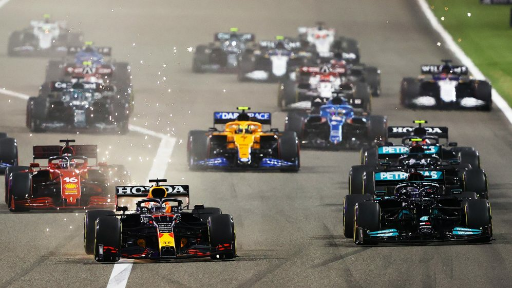

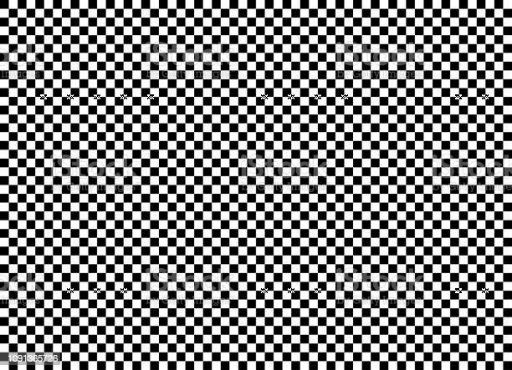

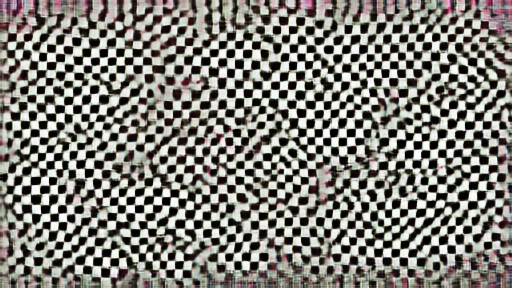

In [41]:
content_path = 'datasets/11/style_transfer/f1.jpg'
style_path = 'datasets/11/style_transfer/chess.jpg'
l(content_path, style_path)

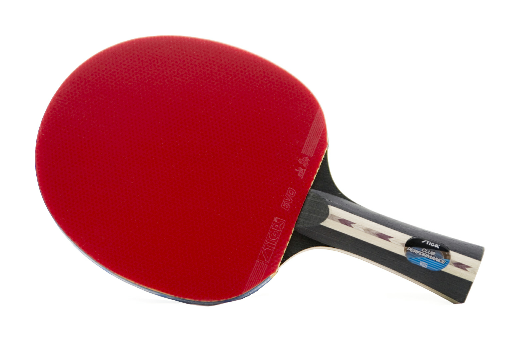

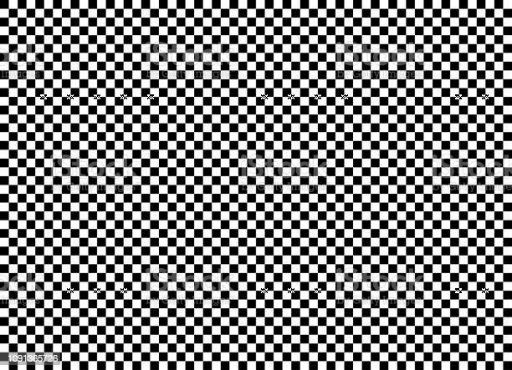

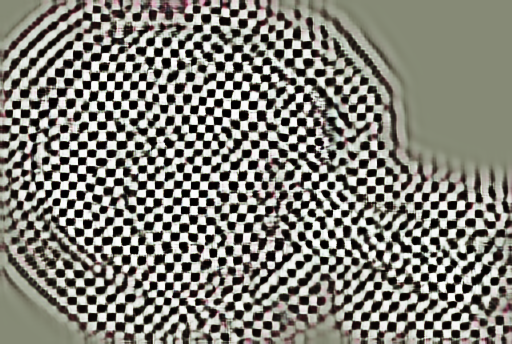

In [42]:
content_path = 'datasets/11/style_transfer/tt.jpg'
style_path = 'datasets/11/style_transfer/chess.jpg'
l(content_path, style_path)

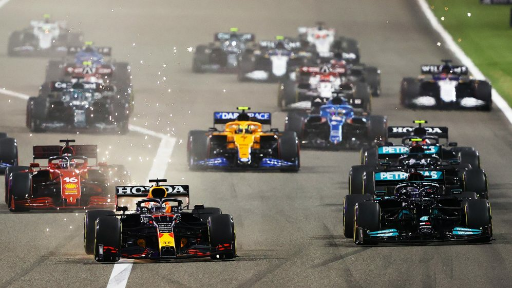

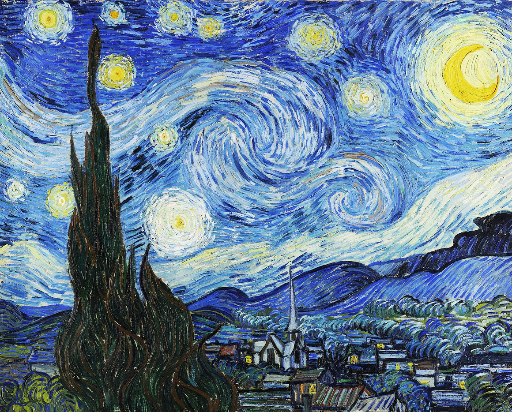

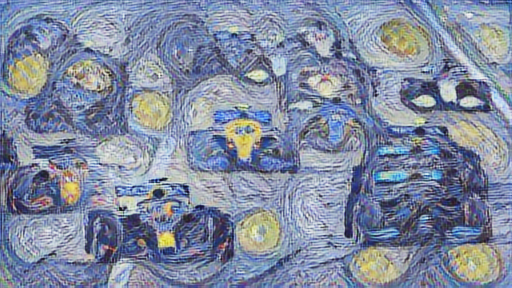

In [43]:
content_path = 'datasets/11/style_transfer/f1.jpg'
style_path = 'datasets/11/style_transfer/style_gogh.jpg'
l(content_path, style_path)

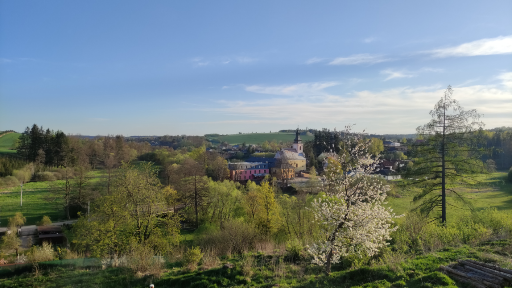

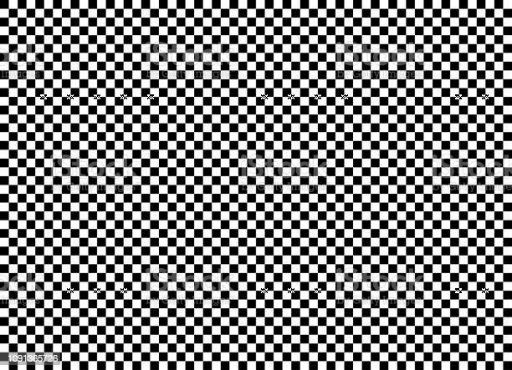

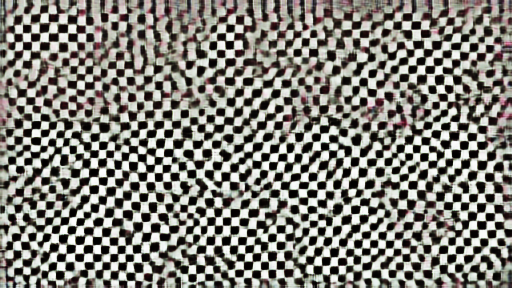

In [44]:
content_path = 'datasets/11/style_transfer/content.jpg'
style_path = 'datasets/11/style_transfer/chess.jpg'
l(content_path, style_path)